# Lab 3

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def show_img(img_1, img_2):
  fig, axs = plt.subplots(1, 2, figsize=(15, 25))
  axs[0].imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
  axs[1].imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
  axs[0].axis('off')
  axs[1].axis('off')

In [5]:
def cal_conv(img, kernel):
  return cv2.filter2D(img, -1, kernel)

## Image 1 : Smoothing

In [3]:
PATH = '/content/drive/MyDrive/Study Documents/CS231 - CV/CS231.L21.KHTN/Tichchap/RawData.jpg'

In [63]:
img = cv2.imread(PATH, 0)

In [6]:
KERNEL_L1 = np.full((3,3),1/9)
KERNEL_L2 = np.array([[1,1,1],[1,2,1],[1,1,1]]).dot(1/9)
KERNEL_L3 = np.array([[1,2,1],[2,4,2],[1,2,1]]).dot(1/16)
KERNEL_L4 = np.array([[0,1,0],[1,1,1],[0,1,0]]).dot(1/5)
KERNEL_L5 = np.array([[0,1,0],[1,4,1],[0,1,0]]).dot(1/8)
KERNEL_L6 = np.array([[1,3,1],[3,16,3],[1,3,1]]).dot(1/32)

In [18]:
img_filted = cal_conv(img, KERNEL_L1)
for i in range(2):
  img_filted = cal_conv(img_filted, KERNEL_L1)

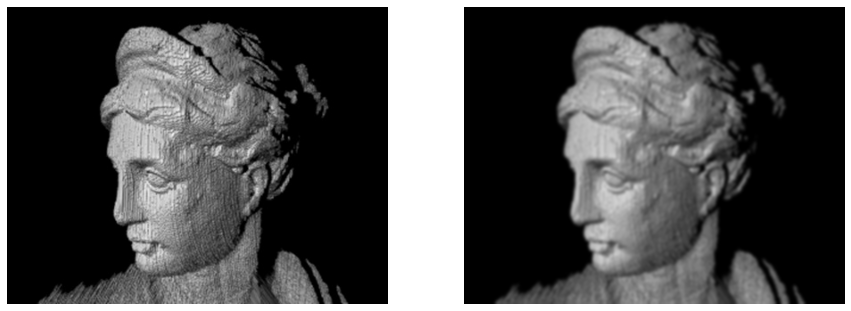

In [92]:
show_img(img, img_filted)

## Image 2: Sharpening

In [20]:
KERNEL_S1 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
KERNEL_S2 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
KERNEL_S3 = np.array([[1,-2,1],[-2,5,-2],[1,-2,1]])

In [21]:
PATH_1 = '/content/drive/MyDrive/Study Documents/CS231 - CV/CS231.L21.KHTN/Tichchap/barbara.jpg'

In [22]:
img_1 = cv2.imread(PATH_1)

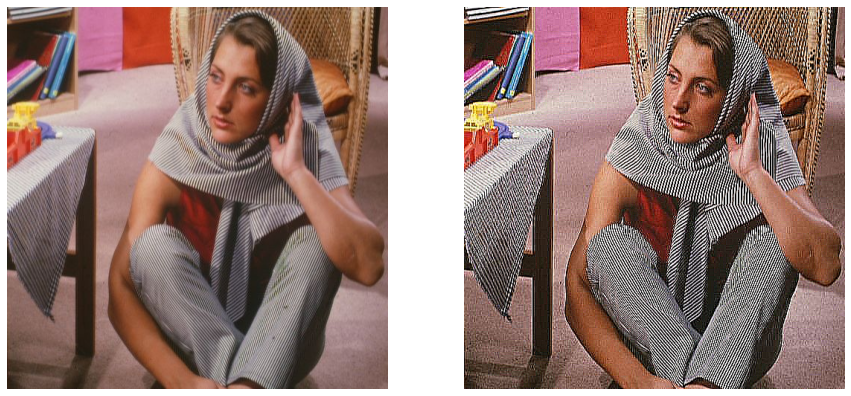

In [97]:
show_img(img_1, cal_conv(img_1, KERNEL_S2))

## Image 3: Directional Filter

In [24]:
PATH_2 = '/content/drive/MyDrive/Study Documents/CS231 - CV/CS231.L21.KHTN/Tichchap/ventg.bmp'

In [25]:
img_2 = cv2.imread(PATH_2,0)

In [26]:
KERNEL_D1 = np.array([[0,0,0],[1,2,1],[0,0,0]]).dot(1/4)
KERNEL_D2 = np.array([[0,0,1],[0,2,0],[1,0,0]]).dot(1/4)
KERNEL_D3 = np.array([[0,1,0],[0,2,0],[0,1,0]]).dot(1/4)
KERNEL_D4 = np.array([[1,0,0],[0,2,0],[0,0,1]]).dot(1/4)

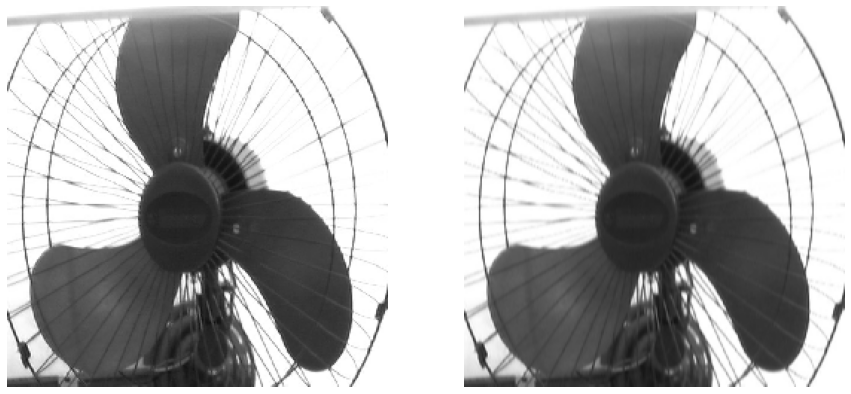

In [102]:
show_img(img_2, cal_conv(img_2, KERNEL_D3))

## Image 4: Edge Detection

In [28]:
PATH_3 = '/content/drive/MyDrive/Study Documents/CS231 - CV/CS231.L21.KHTN/Tichchap/particles.bmp'

In [29]:
img_3 = cv2.imread(PATH_3,0)

In [80]:
kernelsX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernelsY = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

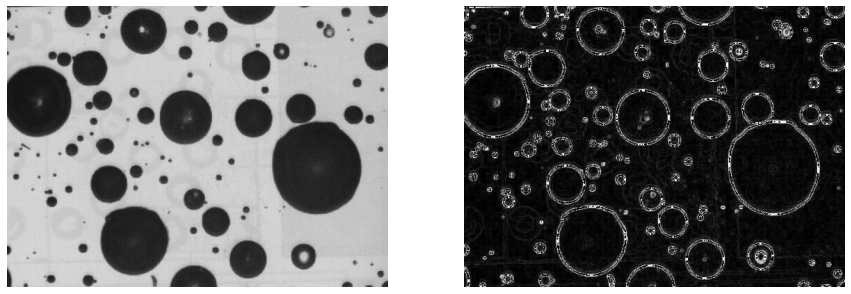

In [98]:
img_X = cal_conv(img_3, kernelsX).astype(np.float32)
img_Y = cal_conv(img_3, kernelsY).astype(np.float32)
img_X_minus = cal_conv(img_3, kernelsX.dot(-1)).astype(np.float32)
img_Y_minus = cal_conv(img_3, kernelsY.dot(-1)).astype(np.float32)
img_all = np.sqrt(img_X ** 2 + img_Y ** 2 + img_X_minus ** 2 + img_Y_minus ** 2).astype(np.uint8)
show_img(img_3, img_all)